In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from tqdm import tqdm

In [10]:
df = pd.read_csv('/Users/quintonaguilera/Desktop/Aederide & Toledo/Data.xlsx - Sheet1.csv', 
                 delimiter=",")

In [14]:
# xs = df[['Tablet', 'Pellet', 'CP', 'AoR','BD','Span', 'HR', 'Y']]
# x_names = ['Tablet', 'Pellet', 'CP', 'AoR','BD','Span', 'HR', 'Y'] 

xs = df[['CP', 'AoR','BD','Span', 'HR', 'Y']]
x_names = ['CP', 'AoR','BD','Span', 'HR', 'Y'] 
# x_names is used for visualising the tree in a subsequent step

ys = df['K']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(xs, ys, test_size=0.2, random_state=0)

attempt=[]
for i in tqdm(range(1,30)):
    regression = DecisionTreeRegressor(random_state=0, max_depth=i)
    regression.fit(x_train, y_train)
    r2 = r2_score(y_test, regression.predict(x_test))
    attempt.append([i, r2])
    
max_r2=[0,0]
for i in tqdm(attempt):
    if i[1]>=max_r2[1]:
        max_r2=i

100%|██████████| 29/29 [00:00<00:00, 100691.07it/s]


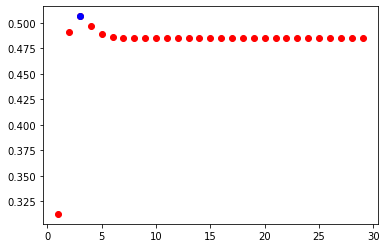

In [16]:
for i in attempt:
    plt.plot(i[0], i[1], 'ro')
    
plt.plot(max_r2[0], max_r2[1], 'bo')
plt.show()

[Text(837.0, 475.65000000000003, 'CP <= 50.0\nmse = 586.991\nsamples = 100.0%\nvalue = 67.611'),
 Text(418.5, 339.75, 'CP <= 30.0\nmse = 177.527\nsamples = 46.9%\nvalue = 84.846'),
 Text(209.25, 203.85000000000002, 'BD <= 0.211\nmse = 55.029\nsamples = 22.9%\nvalue = 90.236'),
 Text(104.625, 67.94999999999999, 'mse = 76.19\nsamples = 2.1%\nvalue = 80.85'),
 Text(313.875, 67.94999999999999, 'mse = 43.429\nsamples = 20.9%\nvalue = 91.16'),
 Text(627.75, 203.85000000000002, 'AoR <= 39.757\nmse = 240.349\nsamples = 24.0%\nvalue = 79.687'),
 Text(523.125, 67.94999999999999, 'mse = 213.712\nsamples = 21.6%\nvalue = 81.672'),
 Text(732.375, 67.94999999999999, 'mse = 125.339\nsamples = 2.4%\nvalue = 61.819'),
 Text(1255.5, 339.75, 'CP <= 70.0\nmse = 454.293\nsamples = 53.1%\nvalue = 52.377'),
 Text(1046.25, 203.85000000000002, 'AoR <= 39.757\nmse = 394.518\nsamples = 26.7%\nvalue = 59.446'),
 Text(941.625, 67.94999999999999, 'mse = 413.179\nsamples = 23.3%\nvalue = 61.595'),
 Text(1150.875, 67

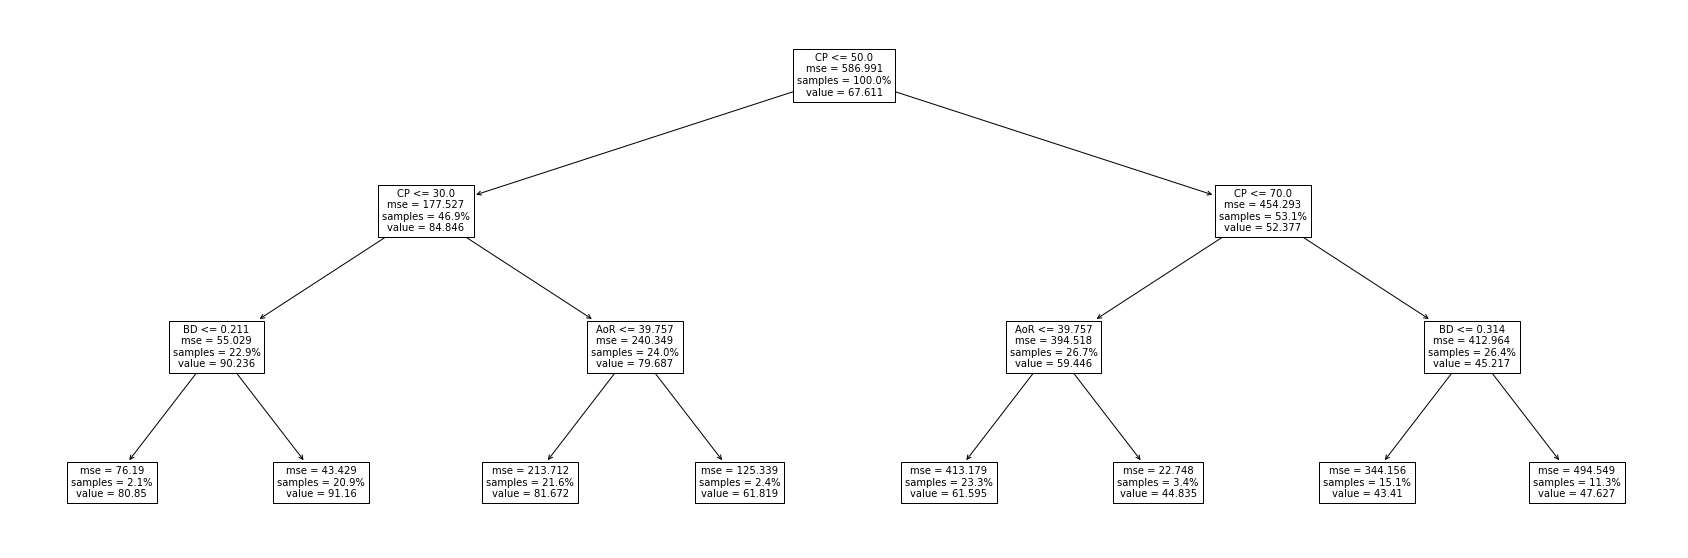

In [17]:
final_regression = DecisionTreeRegressor(random_state=0, max_depth=max_r2[0])
final_regression.fit(x_train, y_train)
plt.figure(figsize=(30,10)) # Hard coded for my screen
plot_tree(final_regression, feature_names = x_names, fontsize=10, proportion=True)